# Collaborative Filtering: Movie Recommendation
- Nama : Daffa Haidar Farras
- Username : daffa_haidar
- Email :  daffahaidarfarras@gmail.com

## Topik Rekomendasi Film

# Proyek Analisis Data: Rekomendasi Movie

Seiring pertumbuhan eksponensial konten hiburan digital, seperti film dan anime, pengguna semakin kesulitan menemukan tayangan yang relevan dan sesuai minat. Platform seperti Netflix, Crunchyroll, dan MyAnimeList menghadapi tantangan besar dalam mengelola dan merekomendasikan ribuan judul kepada jutaan pengguna. Oleh karena itu, pengembangan sistem rekomendasi cerdas menjadi sangat penting untuk meningkatkan pengalaman pengguna dan efisiensi dalam menjelajahi konten.

Metode Collaborative Filtering (CF) telah menjadi pendekatan utama dalam sistem rekomendasi, yang memanfaatkan kesamaan antar pengguna atau item berdasarkan histori interaksi mereka. Meskipun efektif, CF klasik memiliki kelemahan seperti cold-start problem dan kesulitan menangani data spars. Untuk mengatasi keterbatasan ini, pada projek ini menggunakan pendekatan seperti LightFM, yang melakukan collaborative filtering, serta Neural Collaborative Filtering (NCF), yang menggunakan jaringan saraf untuk memodelkan interaksi pengguna dan item secara lebih kompleks dan non-linear.


Link Dataset : https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database

## Business Understanding

### Problem Statements
- Bagaimana membangun sistem rekomendasi anime yang akurat dengan pendekatan klasik maupun modern untuk meningkatkan relevansi rekomendasi?
- Bagaimana membandingkan performa antara algoritma CF klasik berbasis LightFM dan Neural Collaborative Filtering (NCF)?

### Goals
- Mengimplementasikan dua model rekomendasi—LightFM Collaborative Filtering dan Neural Collaborative Filtering (NCF)—untuk memahami efisiensi dan efektivitas masing-masing.
- Mengukur performa kedua pendekatan menggunakan metrik evaluasi seperti Precision@K.

### Solution Statement
- Sistem rekomendasi anime akan dibangun dengan dua pendekatan utama yaitu, LightFM (Collaborative Filtering klasik) dan Neural Collaborative Filtering (NCF) berbasis deep learning.
- Evaluasi performa dilakukan dengan metrik Precision@K

### Deskripsi:
Dataset ini berisi informasi tentang 12,294 anime dan preferensi dari 73,515 pengguna yang berbeda. Secara khusus, dataset ini mencakup user Id, movie Id, rating, dan genre

### Kolom/Fitur


### Usability dan Jumlah Baris
- Usability : 8.24
- **anime.csv** :
  - Jumlah Baris : 12,294
  - Jumlah Kolom : 7
- **rating.csv** :
  - Jumlah Baris : 7,813,737
  - Jumlah Kolom : 3

# Import Library

In [ ]:
pip install lightfm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp311-cp311-linux_x86_64.whl size=831164 sha256=ca24b9bd2dd99119f16a86c0102f2f2149f3a37b24ee9b475448b6d464676ce2
  Stored in directory: /root/.cache/pip/wheels/b9/0d/8a/0729d2e6e3ca2a898ba55201f905da7db3f838a33df5b3fcdd
Successfully built lightfm


In [ ]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split
import random

from lightfm import LightFM
from lightfm.data import Dataset
from lightfm.evaluation import precision_at_k, auc_score

import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.models import Model

from sklearn.preprocessing import LabelEncoder

# Load Dataset

In [ ]:
# Download latest version
path = kagglehub.dataset_download("CooperUnion/anime-recommendations-database")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/anime-recommendations-database


In [ ]:
# Path disesuaikan dengan path download
data_movie = pd.read_csv("/kaggle/input/anime-recommendations-database/anime.csv")
data_rating = pd.read_csv("/kaggle/input/anime-recommendations-database/rating.csv")

In [ ]:
data_movie

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [ ]:
data_rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


# Data Understanding

Pada tahap ini, akan memahami struktur dataset, termasuk:
- Jumlah baris dan kolom.
- Jenis data (numerik/kategorik).
- Distribusi nilai.

In [ ]:
data_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


Insight:

| Kolom | Deskripsi|
|---|---|
|user_id | non identifiable randomly generated user id. |
|anime_id | the anime that this user has rated. |
|rating | rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating). |

- Semua Fitur memiliki tipe data `int64`

In [ ]:
data_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Insight:

| Kolom | Deskripsi |
|---|---|
| anime_id | myanimelist.net's unique id identifying an anime. |
|name | full name of anime.|
|genre | comma separated list of genres for this anime.|
|type | movie, TV, OVA, etc.|
|episodes | how many episodes in this show. (1 if movie).|
|rating | average rating out of 10 for this anime.|
|members | number of community members that are in this anime's "group".|

- 3 dari 8 Fitur memiliki tipe data `int64`
- 1 dari 8 fitur memiliki tipe data `float64`
- 4 dari 8 fitur memiliki tipe data `object`

In [ ]:
data_movie.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [ ]:
data_movie.shape

(12294, 7)

Insight :

Pada **data_movie** ini memiliki

|Jumlah Baris|Jumlah Kolom|
|---|---|
|12.294|8|

In [ ]:
data_rating.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [ ]:
data_rating.shape

(7813737, 3)

Insight :

Pada **data_rating** ini memiliki

|Jumlah Baris|Jumlah Kolom|
|---|---|
|7.813.737|4|

In [ ]:
print('Banyak data Movie: ', len(data_movie.anime_id.unique()))
print('Banyak data User: ', len(data_rating.user_id.unique()))

Banyak data Movie:  12294
Banyak data User:  73515


## Cek Duplikat

Untuk mengecek apakah ada data yang terduplikat

In [ ]:
print(data_movie.duplicated().sum())

0


In [ ]:
print(data_rating.duplicated().sum())

1


Insight :
- Untuk data_movie tidak ditemukan duplikat data
- Tetapi, untuk data_rating terdapat 1 duplikat data

## Missing Value

Untuk mengecek apakah ada data yang hilang

In [ ]:
print(data_movie.isnull().sum())

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [ ]:
print(data_rating.isnull().sum())

user_id     0
anime_id    0
rating      0
dtype: int64


Insight :
- Untuk data_movie ditemukan beberapa missing data
- Untuk data_rating tidak terdapat missing data

# Exploratory Data Analysis

## Univariate Analysis

### Distribusi Rating

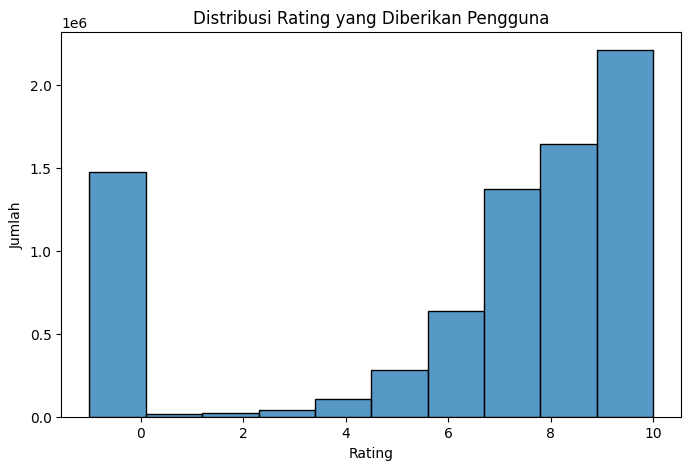

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data_rating['rating'], bins=10, kde=False)
plt.title('Distribusi Rating yang Diberikan Pengguna')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

Insight:
- Rating 10 mendominasi sebagai nilai paling sering diberikan, diikuti oleh rating 9 dan 8.
- Rating 0 juga sangat tinggi, kemungkinan besar karena mencerminkan anime yang ditambahkan ke daftar namun belum ditonton atau belum diberi rating oleh pengguna (missing rating).
- Distribusi ini tidak simetris dan sangat condong ke arah positif (skewed right), mengindikasikan adanya bias terhadap anime favorit atau populer.

## Multivariate Analysis

### Movie Populer

<ipython-input-30-e8b577c7981e>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated['rating_mean'], y=top_rated['name'], palette="viridis")


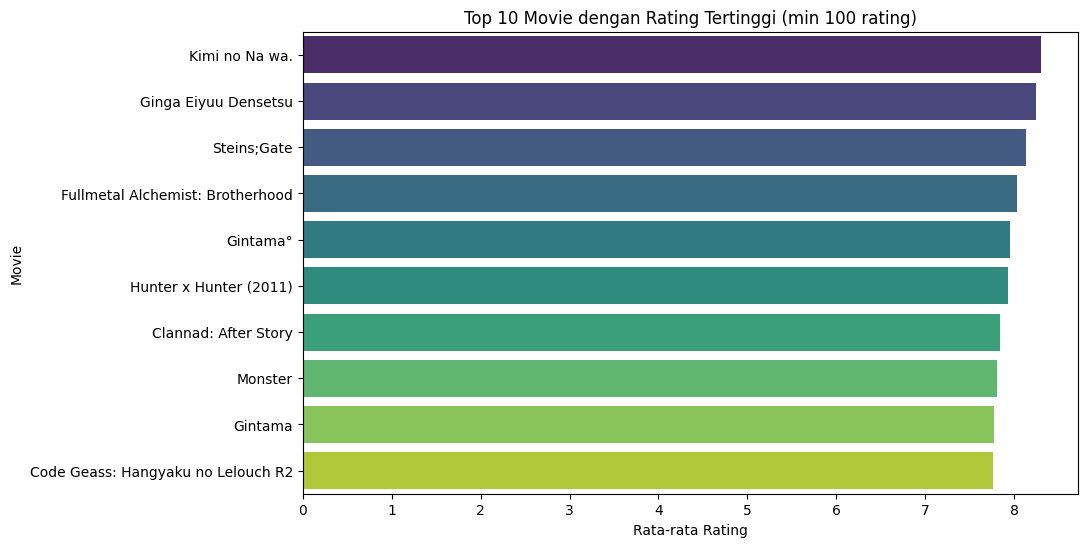

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Rename agar kolom bisa di-merge
data_movie = data_movie.rename(columns={"anime_id": "anime_id"})

# Gabungkan rating dengan info movie
ratings_with_titles = pd.merge(data_rating, data_movie[['anime_id', 'name']], on='anime_id')

# Grouping berdasarkan anime_id, hitung rata-rata dan jumlah rating
movie_stats = ratings_with_titles.groupby('anime_id').agg(
    rating_mean=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

# Filter hanya movie dengan setidaknya 100 rating
movie_stats = movie_stats[movie_stats['rating_count'] >= 100]

# Ambil nama movie dari data_movie
movie_stats = pd.merge(movie_stats, data_movie[['anime_id', 'name']], on='anime_id')

# Ambil Top 10 berdasarkan rata-rata rating tertinggi
top_rated = movie_stats.sort_values('rating_mean', ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rated['rating_mean'], y=top_rated['name'], palette="viridis")
plt.title("Top 10 Movie dengan Rating Tertinggi (min 100 rating)")
plt.xlabel("Rata-rata Rating")
plt.ylabel("Movie")
plt.show()


Insight:
- "Kimi no Na wa." dan "Ginga Eiyuu Densetsu" menempati posisi teratas dengan rating rata-rata di atas 8

### Genre Terpopuler

<ipython-input-31-c3b70533c9bf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values[:15], y=genre_counts.index[:15], palette="magma")


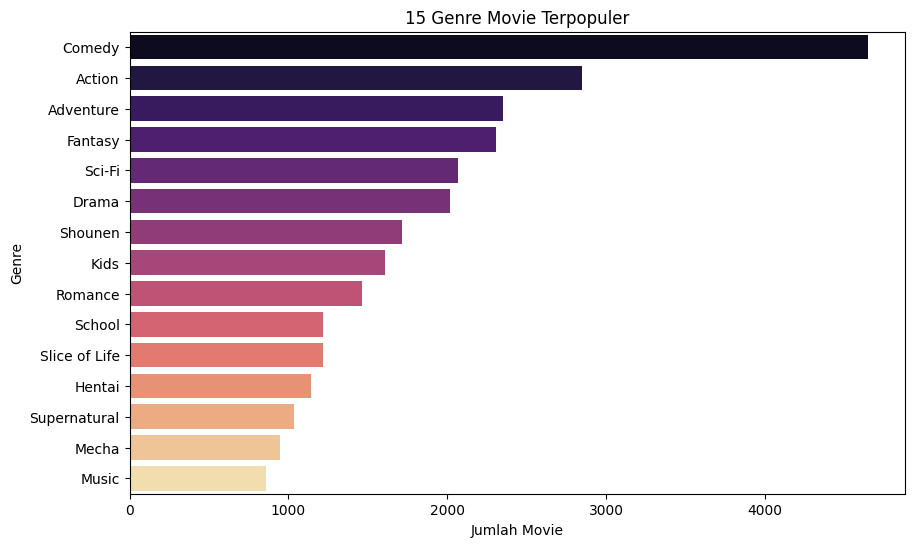

In [ ]:
# Pisahkan genre
movie_exploded = data_movie.dropna(subset=["genre"]).copy()
movie_exploded["genre"] = movie_exploded["genre"].str.split(", ")
genre_counts = movie_exploded.explode("genre")["genre"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values[:15], y=genre_counts.index[:15], palette="magma")
plt.title("15 Genre Movie Terpopuler")
plt.xlabel("Jumlah Movie")
plt.ylabel("Genre")
plt.show()

# Data Preparation

Insight:
- Genre "Comedy", "Action", dan "Adventure" merupakan tiga genre paling dominan dalam koleksi dataset.
- Genre seperti "Music", "Mecha", dan "Supernatural" memiliki jumlah yang lebih sedikit

## Data Cleaning

### Menanagani Data Duplikat

In [ ]:
print(data_movie.duplicated().sum())

0


In [ ]:
print(data_rating.duplicated().sum())

1


In [ ]:
data_rating = data_rating.drop_duplicates()

Insight :
- Untuk data_movie tidak ditemukan duplikat data
- Tetapi, untuk data_rating terdapat 1 duplikat data
- Sehingga, untuk data yang terduplikat yang ada pada data_rating saya menghapus barisnya

### Menangani Missing Value

In [ ]:
print(data_movie.isnull().sum())

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [ ]:
print(data_rating.isnull().sum())

user_id     0
anime_id    0
rating      0
dtype: int64


In [ ]:
data_movie = data_movie.dropna()

Insight :
- Untuk data_movie ditemukan beberapa missing data
- Untuk data_rating tidak terdapat missing data
- Sehingga, untuk data yang missing yang ada pada data_movie saya menghapus barisnya

## Filter Data

In [ ]:
# Hitung item dan user yang aktif (dengan minimal 100 interaksi)
item_count = data_rating['anime_id'].value_counts()
user_count = data_rating['user_id'].value_counts()

# Ambil item dan user yang memenuhi syarat
active_items = item_count[item_count >= 100].index
active_users = user_count[user_count >= 100].index

# Filter data_rating berdasarkan item dan user yang aktif
filtered_data = data_rating[
    (data_rating['anime_id'].isin(active_items)) &
    (data_rating['user_id'].isin(active_users))
]

Insight:
- Hanya menggunakan data dari pengguna dan item yang aktif
- Supaya matriks interaksi menjadi lebih padat
- Fokus pada film yang cukup sering dirating akan memberi insight yang lebih dapat diandalkan.

In [ ]:
filtered_data

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813730,73515,13659,8
7813731,73515,14345,7
7813732,73515,16512,7
7813733,73515,17187,9


## Splitting Data

In [ ]:
train_df, test_df = train_test_split(filtered_data, test_size=0.2, random_state=42)

Insight:
- Melakukan splitting data untuk data latih dan data uji

### Mapping

Membuat objek `Dataset` dan memetakan `ID user` dan `item`

In [ ]:
dataset = Dataset()
dataset.fit(
    train_df['user_id'].unique(),
    train_df['anime_id'].unique()
    )

Membuat reverse mapping dari index ke ID asli

In [ ]:
user_id_map, _, item_id_map, _ = dataset.mapping()

reverse_user_map = {index: userId for userId, index in user_id_map.items()}
reverse_item_map = {index: itemId for itemId, index in item_id_map.items()}

Membuat dictionary untuk mengubah `movieId` ke judul `film` (name)

In [ ]:
movie_id_to_title = dict(zip(data_movie['anime_id'].astype(int), data_movie['name']))

## Fit LabelEncoder

Tahapan ini penting yang nantinya akan digunakan untuk membangun model NCF

In [ ]:
from sklearn.preprocessing import LabelEncoder

user_enc = LabelEncoder()
item_enc = LabelEncoder()

user_enc.fit(filtered_data['user_id'])
item_enc.fit(filtered_data['anime_id'])

LabelEncoder()

# LightFM

## Fit Dataset dan Mapping

### Untuk Train data

Membangun objek `interactions_train` berupa matriks interaksi user-item dari `train_df`.

In [ ]:
(interactions_train, _) = dataset.build_interactions(
    ((row['user_id'], row['anime_id'], 1.0 if row['rating'] >= 8 else 0.0)
    for _, row in train_df.iterrows())
    )

### Untuk Test data

Untuk memastikan `test_df` hanya berisi user dan item yang sudah pernah muncul di data latih `train_df`

In [ ]:
valid_users = set(train_df['user_id'])
valid_items = set(train_df['anime_id'])
test_df = test_df[test_df['user_id'].isin(valid_users) & test_df['anime_id'].isin(valid_items)]

Membangun objek `interactions_test` berupa matriks interaksi user-item dari `test_df`.

In [ ]:
(interactions_test, _) = dataset.build_interactions(
    [(row['user_id'], row['anime_id'], 1.0 if row['rating'] >= 7 else 0.0)
    for _, row in test_df.iterrows()]
    )

## Training LightFM

In [ ]:
model_lightFM = LightFM(loss='warp', random_state=42)
model_lightFM.fit(
    interactions_train,
    epochs=10,
    num_threads=4,
    verbose=True
)

Epoch: 100%|██████████| 10/10 [01:02<00:00,  6.22s/it]


## Evaluasi model LightFM

In [ ]:
from lightfm.evaluation import precision_at_k, recall_at_k, auc_score

k = 5
precision = precision_at_k(model_lightFM, interactions_test, k=k).mean()
recall = recall_at_k(model_lightFM, interactions_test, k=k).mean()
auc = auc_score(model_lightFM, interactions_test).mean()

In [ ]:
print(f"[LightFM Evaluation]")
print(f"Precision@{k}: {precision:.4f}")
print(f"Recall@{k}: {recall:.4f}")
print(f"AUC Score: {auc:.4f}")

[LightFM Evaluation]
Precision@5: 0.1721
Recall@5: 0.0230
AUC Score: 0.9134


Insight :
- `Precision@5`:
  - Artinya, rata-rata 17.21% dari 5 rekomendasi teratas yang diberikan kepada pengguna benar-benar relevan (dalam konteks: rating tinggi atau disukai user).
- `AUC Score`:
  - Area Under Curve (AUC) menunjukkan seberapa baik model membedakan item yang disukai dan tidak disukai user. Nilai mendekati 1.0 (maksimal) berarti:
    - Model sangat baik dalam ranking item yang benar di atas item yang salah.
    - Nilai 0.91 ini sangat bagus, artinya model punya kemampuan prediksi yang sangat baik.
- `Recall@5`:
  - Rata-rata hanya 2.3% dari total item relevan yang berhasil ditemukan di top-5.



## Prediksi

In [ ]:
user_id = random.choice(train_df['user_id'].unique())
user_internal_id = dataset.mapping()[0].get(user_id)
n_users, n_items = interactions_train.shape

scores = model_lightFM.predict(
    user_ids=np.full(n_items, user_internal_id),
    item_ids=np.arange(n_items)
)

top_items = np.argsort(-scores)[:10]
data_movie['anime_id'] = data_movie['anime_id'].astype(int)

liked_movies = filtered_data[(filtered_data['user_id'] == user_id) & (filtered_data['rating'] >= 7)]
liked_titles = data_movie[data_movie['anime_id'].isin(liked_movies['anime_id'])]['name'].head(5).tolist()

print(f"\n User {user_id} menyukai film berikut (rating >= 7):")
for i, title in enumerate(liked_titles, start=1):
    print(f"{i}. {title}")


print(f"\nTop 10 Rekomendasi untuk User {user_id}:\n")

# Pastikan movie_df['anime_id'] bertipe int agar cocok dengan reverse map
data_movie['anime_id'] = data_movie['anime_id'].astype(int)

for rank, item_index in enumerate(top_items, start=1):
    # Ambil anime_id dari reverse map
    movie_id = reverse_item_map.get(item_index)

    # Ambil judul film dari data_movie
    title_row = data_movie[data_movie['anime_id'] == movie_id]['name'].values
    title_str = title_row[0] if len(title_row) > 0 else f"Movie ID {movie_id}"

    print(f"{rank}. {title_str}")


 User 50272 menyukai film berikut (rating >= 7):
1. Fullmetal Alchemist: Brotherhood
2. Gintama°
3. Steins;Gate
4. Gintama&#039;
5. Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare

Top 10 Rekomendasi untuk User 50272:

1. Ore no Imouto ga Konnani Kawaii Wake ga Nai
2. Chuunibyou demo Koi ga Shitai!
3. Working!!
4. Bakemonogatari
5. Yahari Ore no Seishun Love Comedy wa Machigatteiru.
6. Toaru Majutsu no Index
7. Working&#039;!!
8. Nisemonogatari
9. Toaru Kagaku no Railgun
10. Seitokai Yakuindomo


# Training Neural Collaborative Filtering (NCF)

In [ ]:
data_rating[['user_id', 'anime_id', 'rating']]

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


menggunakan `LabelEncoder` dari sklearn untuk mengubah `ID user` dan `item` menjadi indeks numerik

In [ ]:
train_df['user_id_enc'] = user_enc.transform(train_df['user_id'])
train_df['item_enc'] = item_enc.transform(train_df['anime_id'])

test_df['user_id_enc'] = user_enc.transform(test_df['user_id'])
test_df['item_enc'] = item_enc.transform(test_df['anime_id'])

num_users = len(user_enc.classes_)
num_items = len(item_enc.classes_)

## Bangun model NCF

In [ ]:
# Input layers
user_input = Input(shape=(1,), name='user_input')
item_input = Input(shape=(1,), name='item_input')

# Embedding layers
user_embedding = Embedding(input_dim=num_users, output_dim=32, name='user_embedding')(user_input)
item_embedding = Embedding(input_dim=num_items, output_dim=32, name='item_embedding')(item_input)

# Flatten
user_vec = Flatten()(user_embedding)
item_vec = Flatten()(item_embedding)

# Concatenate
concat = Concatenate()([user_vec, item_vec])

# Fully connected layers
fc = Dense(128, activation='relu')(concat)
fc = Dense(64, activation='relu')(fc)
output = Dense(1)(fc)

# Build model
model_NCF = Model(inputs=[user_input, item_input], outputs=output)
model_NCF.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_NCF.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 32)     │    795,488 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_embedding      │ (None, 1, 32)     │    146,912 │ item_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 32)        │          0 │ user_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 32)        │          0 │ item_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64)        │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │      8,320 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 959,041 (3.66 MB)

 Trainable params: 959,041 (3.66 MB)

 Non-trainable params: 0 (0.00 B)

Mengubah user dan movie ID menjadi angka

In [ ]:
# Training data
X_train_user = train_df['user_id_enc'].values
X_train_item = train_df['item_enc'].values
y_train = train_df['rating'].values

# Testing data
X_test_user = test_df['user_id_enc'].values
X_test_item = test_df['item_enc'].values
y_test = test_df['rating'].values


## Training NCF

In [ ]:
# Train
model_NCF.fit(
    x=[X_train_user, X_train_item],
    y=y_train,
    epochs=10,
    batch_size=1024,
    validation_data=([X_test_user, X_test_item], y_test)
)

Epoch 1/10
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 71s 15ms/step - loss: 7.2754 - mae: 1.7665 - val_loss: 4.4732 - val_mae: 1.3192
Epoch 2/10
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 77s 16ms/step - loss: 4.3645 - mae: 1.3217 - val_loss: 4.2314 - val_mae: 1.2963
Epoch 3/10
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 70s 15ms/step - loss: 4.0421 - mae: 1.2598 - val_loss: 3.9836 - val_mae: 1.2599
Epoch 4/10
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 83s 15ms/step - loss: 3.7965 - mae: 1.2120 - val_loss: 3.9103 - val_mae: 1.2327
Epoch 5/10
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 85s 16ms/step - loss: 3.6367 - mae: 1.1811 - val_loss: 3.8464 - val_mae: 1.2045
Epoch 6/10
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 79s 15ms/step - loss: 3.5100 - mae: 1.1575 - val_loss: 3.8549 - val_mae: 1.2255
Epoch 7/10
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 68s 15ms/step - loss: 3.3975 - mae: 1.1382 - val_loss: 3.8177 - val_mae: 1.1851
Epoch 8/10
4675/4675 ━━━━━━━━━━━━━━━━━━━━ 68s 14ms/step - loss: 3.2896 - mae: 1.1192 - val_loss: 3.7927 - val_mae: 1.1911
Epoch 9/10
4675/4675 ━━━

## Evaluasi Neural Collaborative Filtering (NCF)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prediksi rating NCF
y_pred = model_NCF.predict([X_test_user, X_test_item]).flatten()

# Hitung MSE dan MAE (regression evaluation)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\n[NCF Regression Evaluation]")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Buat DataFrame untuk evaluasi ranking
pred_df = pd.DataFrame({
    'user': X_test_user,
    'item': X_test_item,
    'true_rating': y_test,
    'pred_rating': y_pred
})

# Hitung Precision@K dan Recall@K untuk NCF
def precision_recall_at_k(df, k=5, threshold=8.0):
    precision_list = []
    recall_list = []

    for user_id in df['user'].unique():
        user_data = df[df['user'] == user_id]

        # Top-K prediksi tertinggi
        top_k_items = user_data.sort_values('pred_rating', ascending=False).head(k)
        relevant_items = user_data[user_data['true_rating'] >= threshold]

        n_relevant = len(relevant_items)
        if n_relevant == 0:
            continue  # skip user tanpa item relevan

        hit = top_k_items[top_k_items['true_rating'] >= threshold]

        precision = len(hit) / k
        recall = len(hit) / n_relevant

        precision_list.append(precision)
        recall_list.append(recall)

    return np.mean(precision_list), np.mean(recall_list)

# Evaluasi NCF Top-K (K = 5)
k = 5
precision_ncf, recall_ncf = precision_recall_at_k(pred_df, k=k, threshold=8.0)

print(f"\n[NCF Top-K Evaluation]")
print(f"Precision@{k}: {precision_ncf:.4f}")
print(f"Recall@{k}: {recall_ncf:.4f}")

37394/37394 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step

[NCF Regression Evaluation]
Mean Squared Error (MSE): 3.8368
Mean Absolute Error (MAE): 1.2000

[NCF Top-K Evaluation]
Precision@5: 0.7983
Recall@5: 0.2351


Insight :
- `Precision@5`:
  - Artinya, rata-rata 79.83% dari 5 rekomendasi teratas yang diberikan kepada pengguna benar-benar relevan (dalam konteks: rating tinggi atau disukai user).
- `Recall@5`:
  - Rata-rata hanya 23.5% dari total item relevan yang berhasil ditemukan di top-5.
- `MSE` :
  - 3.8368 ini menunjukan bahwa model tidak menghasilkan kesalahan besar pada sebagian besar data
- `MAE` :
 - 1.2 ini menunjukan model sudah cukup baik, tetapi model masih bisa ditingkatkan untuk bisa mendapatkan presisi yang lebih baik


## Prediksi

In [ ]:
def recommend_top_n(user_id, n=10):
    # Encode user_id ke indeks internal
    encoded_user = user_enc.transform([user_id])[0]

    # Buat array item_id untuk semua item
    item_ids = np.arange(num_items)
    user_array = np.full_like(item_ids, encoded_user)

    # Prediksi rating untuk semua item dari user ini
    predictions = model_NCF.predict([user_array, item_ids], verbose=0).flatten()

    # Urutkan prediksi dan ambil top N
    top_n_indices = predictions.argsort()[-n:][::-1]

    # Decode item indices ke anime_id asli
    recommended_movie_ids = item_enc.inverse_transform(top_n_indices)

    # Ambil judul dari data_movie
    recommended_titles = data_movie[data_movie['anime_id'].isin(recommended_movie_ids)][['anime_id', 'name']]

    # Urutkan sesuai urutan prediksi
    ordered_titles = [recommended_titles[recommended_titles['anime_id'] == mid]['name'].values[0]
                      if not recommended_titles[recommended_titles['anime_id'] == mid].empty
                      else f"Movie ID {mid}"
                      for mid in recommended_movie_ids]
    top_items = np.argsort(-scores)[:10]
    data_movie['anime_id'] = data_movie['anime_id'].astype(int)

    liked_movies = filtered_data[(filtered_data['user_id'] == user_id) & (filtered_data['rating'] >= 7)]
    liked_titles = data_movie[data_movie['anime_id'].isin(liked_movies['anime_id'])]['name'].head(5).tolist()

    print(f"\n User {user_id} menyukai film berikut (rating >= 7):")
    for i, title in enumerate(liked_titles, start=1):
        print(f"{i}. {title}")


    print(f"\nTop {n} Rekomendasi untuk User {user_id} (NCF):")
    for i, title in enumerate(ordered_titles, 1):
        print(f"{i}. {title}")

    return recommended_movie_ids

# Misalnya kamu mau rekomendasi untuk user dengan ID 5
recommend_top_n(user_id=(random.choice(train_df['user_id'].unique())), n=10)



 User 56577 menyukai film berikut (rating >= 7):
1. Gintama°
2. Steins;Gate
3. Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare
4. Clannad: After Story
5. Gintama

Top 10 Rekomendasi untuk User 56577 (NCF):
1. Hidamari Sketch: Sae Hiro Sotsugyou-hen
2. Shigatsu wa Kimi no Uso
3. Gintama°
4. Mushishi Zoku Shou: Odoro no Michi
5. Fate/stay night: Unlimited Blade Works - Prologue
6. Shokugeki no Souma
7. Stand By Me Doraemon
8. Kuroshitsuji: Book of Murder
9. Re:Zero kara Hajimeru Isekai Seikatsu
10. Boku dake ga Inai Machi


array([17739, 23273, 28977, 24687, 27821, 28171, 21469, 23317, 31240,
       31043])